In [3]:
import cv2
import helpers
import numpy as np
import matplotlib.pyplot as plt
import pickle
from od_metrics.BoundingBox import BoundingBox
from od_metrics.BoundingBoxes import BoundingBoxes
from od_metrics.utils import BBFormat, BBType
from od_metrics.Evaluator import Evaluator

use_pickle = False
pickle_path = '../kaggle_dataset_863/kaggle_863_alt_with_two_labels.pkl'

In [4]:
# load images and associated faces
# this takes a second since we load with cv2
if not use_pickle:
    imgs_with_labels = helpers.load_kaggle_863('../kaggle_dataset_863')
    imgs_with_labels = helpers.convert_kaggle_863_for_metrics_class_labels(imgs_with_labels)
    with open(pickle_path, 'wb') as f:
        pickle.dump(imgs_with_labels, f)
else:
    with open(pickle_path, 'rb') as f:
        imgs_with_labels = pickle.load(f)

print(len(imgs_with_labels['raw_data']))

853


In [ ]:
class maskResult:
    def __init__(self, vals, prediction):
        self.vals = vals
        self.prediction = prediction

# Load Data

In [ ]:
maskPredPath = '../full_run_data/maskPrediction'
cropCoordPath = '../full_run_data/cropCoordinates'
cropImgsPath = '../full_run_data/cropImages'

with open(maskPredPath, 'rb') as f:
    maskPreds = pickle.load(f)
    
with open(cropCoordPath, 'rb') as f:
    cropCoords = pickle.load(f)

with open(cropImgsPath, 'rb') as f:
    cropImgs = pickle.load(f)

In [70]:
img_name_mapping = []
with open('../mask name order.txt', 'r') as f:
    for line in f:
        img_name_mapping.append(line.strip())

# Compute Metrics

In [87]:
maskPreds[1][0].prediction

0

In [93]:
maskPreds[0][0].vals

array([[0.11774208, 0.88225794]], dtype=float32)

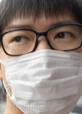

In [89]:
cropImgs[1][0]

In [102]:
bbox_store = imgs_with_labels['bboxes'].clone()

for i in range(len(maskPreds)):
    for j in range(len(maskPreds[i])):
        class_id = 'without_mask' if maskPreds[i][j].prediction == 1 else 'with_mask'
        box = cropCoords[i][j]
        b = BoundingBox(
            imageName = img_name_mapping[i],
            classId = class_id,
            x = box['x1'],
            y = box['y1'],
            w = box['x2'],
            h = box['y2'],
            bbType = BBType.Detected,
            format = BBFormat.XYX2Y2,
            classConfidence = maskPreds[i][j].vals[0][maskPreds[i][j].prediction]
        )
        bbox_store.addBoundingBox(b)

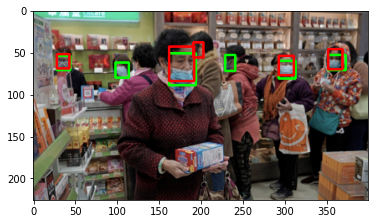

In [103]:
a = imgs_with_labels['raw_data']['maksssksksss13']
img = np.copy(a['img'])
img = bbox_store.drawAllBoundingBoxes(img, 'maksssksksss13')
img = helpers.to_rgb(img)
plt.imshow(img)

In [113]:
evaluator = Evaluator()
metrics = evaluator.GetPascalVOCMetrics(bbox_store,
                                              IOUThreshold=0.3)
total_pos = metrics[0]['total positives']
tp = metrics[0]['total TP']
fp = metrics[0]['total FP']
metric_dict = {
    'total positives': total_pos,
    'total TP': tp,
    'total FP': fp,
    'prec': helpers.compute_precision(tp, fp),
    'recall': helpers.compute_recall(tp, total_pos)
}

In [114]:
metric_dict

{'total positives': 3232,
 'total TP': 2454.0,
 'total FP': 220.0,
 'prec': 0.9177262528047868,
 'recall': 0.7592821782178217}

In [115]:
total_pos = metrics[1]['total positives']
tp = metrics[1]['total TP']
fp = metrics[1]['total FP']
metric_dict_no_mask = {
    'total positives': total_pos,
    'total TP': tp,
    'total FP': fp,
    'prec': helpers.compute_precision(tp, fp),
    'recall': helpers.compute_recall(tp, total_pos)
}

In [116]:
metric_dict_no_mask

{'total positives': 840,
 'total TP': 665.0,
 'total FP': 344.0,
 'prec': 0.6590683845391476,
 'recall': 0.7916666666666666}